In [25]:
import pandas as pd

In [77]:
df = pd.read_csv('predictive_maintenance.csv')
df.shape

(10000, 10)

**FEATURE ENGINEERING

In [30]:
import featuretools as ft
import pandas as pd

In [31]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [32]:
df_train = pd.DataFrame(df)

In [33]:
es = ft.EntitySet("maintenance")

"""es.add_dataframe(dataframe_name="maintenance",
                        index="Id",
                        time_index="SalePrice",
                        dataframe=train_df)
"""
es = es.add_dataframe(
    dataframe_name="maintenance",
    dataframe=df_train,
    index="UDI"#,
    #time_index="YrSold"#,
    #logical_types={
     #   "product_id": Categorical,
      #  "zip_code": PostalCode,
    #},
)

In [34]:
es

Entityset: maintenance
  DataFrames:
    maintenance [Rows: 10000, Columns: 10]
  Relationships:
    No relationships

In [35]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="maintenance",
                                      agg_primitives=["count"],
                                      trans_primitives=["month"],
                                      max_depth=1)

In [36]:
feature_defs

[<Feature: Type>,
 <Feature: Air temperature [K]>,
 <Feature: Process temperature [K]>,
 <Feature: Rotational speed [rpm]>,
 <Feature: Torque [Nm]>,
 <Feature: Tool wear [min]>,
 <Feature: Target>,
 <Feature: Failure Type>]

In [37]:
feature_matrix

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M,299.0,308.6,1645,33.4,22,0,No Failure


In [38]:
ft.list_primitives()

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,count,aggregation,True,True,"Determines the total number of values, excluding `NaN`.",<ColumnSchema (Semantic Tags = ['index'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
1,n_unique_days_of_calendar_year,aggregation,False,False,Determines the number of unique calendar days.,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>
2,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
3,average_count_per_unique,aggregation,False,False,Determines the average count across all unique value.,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
4,min_count,aggregation,False,False,Calculates the number of occurrences of the min value in a list,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
5,is_monotonically_decreasing,aggregation,False,False,Determines if a series is monotonically decreasing.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = BooleanNullable)>
6,num_true_since_last_false,aggregation,False,False,"Calculates the number of 'True' values since the last `False` value. Description: From a series of Booleans, find the last record with a `False` value. Return the count of 'True' values between that record and the end of the series. Return nan if no values are `False`. Any nan values in the input are ignored. A 'False' value in the last row will result in a count of 0. Examples: >>> num_true_since_last_false = NumTrueSinceLastFalse() >>> num_true_since_last_false([False, True, False, True, True]) 2",<ColumnSchema (Logical Type = Boolean)>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
7,skew,aggregation,False,False,Computes the extent to which a distribution differs from a normal distribution.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
8,entropy,aggregation,False,False,Calculates the entropy for a categorical column,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
9,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>


In [39]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="maintenance",
                                      agg_primitives=["mean", "max", "min", "std", "skew"],
                                      trans_primitives=["time_since_previous"],)

In [40]:
feature_defs

[<Feature: Type>,
 <Feature: Air temperature [K]>,
 <Feature: Process temperature [K]>,
 <Feature: Rotational speed [rpm]>,
 <Feature: Torque [Nm]>,
 <Feature: Tool wear [min]>,
 <Feature: Target>,
 <Feature: Failure Type>]

In [41]:
feature_matrix.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L,298.2,308.7,1408,40.0,9,0,No Failure


**TPOT

In [42]:
# Importo las librerias
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [113]:
df = pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [114]:
df = df.drop(['Product ID'], axis=1)
df = df.drop(['UDI'], axis = 1)

In [115]:
type_dummie = pd.get_dummies(df['Type'])
df2 = pd.concat([df, type_dummie], axis=1)    
df2.drop(['Type'], inplace=True, axis=1)
df2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,0,No Failure,False,False,True
1,298.2,308.7,1408,46.3,3,0,No Failure,False,True,False
2,298.1,308.5,1498,49.4,5,0,No Failure,False,True,False
3,298.2,308.6,1433,39.5,7,0,No Failure,False,True,False
4,298.2,308.7,1408,40.0,9,0,No Failure,False,True,False
...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,False,False,True
9996,298.9,308.4,1632,31.8,17,0,No Failure,True,False,False
9997,299.0,308.6,1645,33.4,22,0,No Failure,False,False,True
9998,299.0,308.7,1408,48.5,25,0,No Failure,True,False,False


In [116]:
Failure_dummie = pd.get_dummies(df['Failure Type'])
df3 = pd.concat([df2, Failure_dummie], axis=1)    
df3.drop(['Failure Type'], inplace=True, axis=1)
df3

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,H,L,M,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
0,298.1,308.6,1551,42.8,0,0,False,False,True,False,True,False,False,False,False
1,298.2,308.7,1408,46.3,3,0,False,True,False,False,True,False,False,False,False
2,298.1,308.5,1498,49.4,5,0,False,True,False,False,True,False,False,False,False
3,298.2,308.6,1433,39.5,7,0,False,True,False,False,True,False,False,False,False
4,298.2,308.7,1408,40.0,9,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,False,True,False,True,False,False,False,False
9996,298.9,308.4,1632,31.8,17,0,True,False,False,False,True,False,False,False,False
9997,299.0,308.6,1645,33.4,22,0,False,False,True,False,True,False,False,False,False
9998,299.0,308.7,1408,48.5,25,0,True,False,False,False,True,False,False,False,False


In [117]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(['Target'], axis=1), df3.Target, train_size=0.75, test_size=0.25, random_state=42)

In [118]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 14)
(2500, 14)
(7500,)
(2500,)


In [119]:
generations=2
population_size=10
pipeline_optimizer = TPOTClassifier(
    generations=generations,
    population_size=population_size,
    verbosity=2,
    random_state=42,
    memory='auto',
    n_jobs=-1,
    scoring='accuracy')

In [120]:
%%time
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9990666666666668

Generation 2 - Current best internal CV score: 0.9990666666666668

Best pipeline: GaussianNB(input_matrix)
CPU times: total: 1.97 s
Wall time: 1min 9s


TPOTClassifier(generations=2, memory='auto', n_jobs=-1, population_size=10,
               random_state=42, scoring='accuracy', verbosity=2)

In [121]:
print(pipeline_optimizer.score(X_test, y_test))

0.9992


In [126]:
pipeline_optimizer.export('tpot_export_default_pipeline.py')

In [122]:
y_pred = pipeline_optimizer.predict(X_test)

In [123]:
y_test_series = pd.Series(y_test, name='Real')
y_pred_series = pd.Series(y_pred, name='Predicho')

# Crear un DataFrame con las Series
df_resultados = pd.DataFrame({'Real': y_test_series, 'Predicho': y_pred_series})

# Imprimir el DataFrame
print(df_resultados)

      Real  Predicho
0      0.0     0.0  
1      NaN     0.0  
2      NaN     0.0  
3      0.0     0.0  
4      NaN     0.0  
...    ...       ...
9975   0.0     NaN  
9977   0.0     NaN  
9989   0.0     NaN  
9993   0.0     NaN  
9998   0.0     NaN  

[4356 rows x 2 columns]


In [124]:
# Definir una función para asignar puntajes según las condiciones
def asignar_puntajes(real, predicho):
    if real == 0 and predicho == 1: #APLICAS UN MANTENIMIENTO INNECESARIO
        return -1
    elif real == 1 and predicho == 1: #APLICAS UN MANTENIMIENTO CORRECTO
        return 5
    elif real == 0 and predicho == 0: #NO SE HACE NADA
        return 0
    elif real == 1 and predicho == 0: #ERA NECESARIO UN MANTENIMIENTO
        return 0
    else:
        return 0

# Aplicar la función a cada fila del DataFrame para crear la nueva columna
df_resultados['Puntaje'] = df_resultados.apply(lambda row: asignar_puntajes(row['Real'], row['Predicho']), axis=1)

# Imprimir el DataFrame con la nueva columna
print(df_resultados)

      Real  Predicho  Puntaje
0      0.0     0.0       0   
1      NaN     0.0       0   
2      NaN     0.0       0   
3      0.0     0.0       0   
4      NaN     0.0       0   
...    ...       ...      ...
9975   0.0     NaN       0   
9977   0.0     NaN       0   
9989   0.0     NaN       0   
9993   0.0     NaN       0   
9998   0.0     NaN       0   

[4356 rows x 3 columns]


In [125]:
GANANCIA_FINAL = df_resultados['Puntaje'].sum()
GANANCIA_FINAL

-5

In [127]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 days 0 hours 11 mins
H2O_cluster_timezone:,America/Argentina/Buenos_Aires
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_djoglar_sgfhxv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.852 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [87]:
from pycaret.datasets import get_data


In [128]:
# Convierto los dataframe de pandas a dataframe de H20
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

train = h2o.H2OFrame(df_train)
test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [129]:
train

Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
L,298.2,308.7,1408,46.3,3,0,No Failure
L,298.1,308.5,1498,49.4,5,0,No Failure
L,298.2,308.6,1433,39.5,7,0,No Failure
L,298.2,308.7,1408,40,9,0,No Failure
M,298.1,308.6,1425,41.9,11,0,No Failure
L,298.1,308.6,1558,42.4,14,0,No Failure
L,298.1,308.6,1527,40.2,16,0,No Failure
M,298.3,308.7,1667,28.6,18,0,No Failure
M,298.5,309,1741,28,21,0,No Failure
H,298.4,308.9,1782,23.9,24,0,No Failure


In [130]:
# Defino cuales columnas son las variables de entrenamiento y cual es el target.
x = train.columns
y = "Target"
x.remove(y)
print(x)

['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']


In [131]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [132]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |█
21:04:42.471: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20240425_210442_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    222                222                         54304                  4            4            4             7             16            14.8153

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.12766882037227e-07
RMSE: 0.0004612666062454847
LogLoss: 2.9159112385470765e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9822354088199046
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      7723  0    0        (0.0/7723.0)
1      0     271  0        (0.0/271.0)
Total  7723  271  0        (0.0/7994.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.982235     1        81
max f2                       0.982235     1        81
max f0point5                 0.982235     1        81
max accuracy                 0.982235     1        81
max precision                1            1        0
max recall                   0.982235     1        81
max specificity              1            1        0
max absolute_mcc             0.982235     1        81
max min_per_class_accuracy   0.982235     1        81
max mean_per_class_accuracy  0.982235     1        81
max tns                      1            7723     0
max fns                      1            270      0
max fps                      5.81614e-08  7723     399
max tps                      0.982235     271      81
max tnr                      1            1        0
max fnr                      1            0.99631  0
max fpr                      5.81614e-08  1        399
max tpr                      0.982235     1        81

Gains/Lift Table: Avg response rate:  3,39 %, avg score:  3,39 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100075                   0.999989           29.4982  29.4982            1                0.999993     1                           0.999993            0.295203        0.295203                   2849.82  2849.82            0.295203
2        0.020015                    0.99998            29.4982  29.4982            1                0.999985     1                           0.999989            0.295203        0.590406                   2849.82  2849.82            0.590406
3        0.0300225                   0.999955           29.4982  29.4982            1                0.999969     1                           0.999982            0.295203        0.885609                   2849.82  2849.82            0.885609
4        0.04003                     0.000374386        11.4305  24.9812            0.3875           0.386704     0.846875                    0.846663            0.114391        1                          1043.05  2398.12            0.993655
5        0.0500375                   0.000129694        0        19.985             0                0.000213494  0.6775                      0.677373            0               1                          -100     1898.5             

In [133]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_3_20240425_210442_model_2,0.992089,0.00882791,0.972131,0.0166052,0.0336929,0.00113521
GBM_3_AutoML_3_20240425_210442,0.991933,0.00932787,0.973136,0.0166052,0.0337172,0.00113685
GBM_1_AutoML_3_20240425_210442,0.991933,0.00943637,0.971993,0.0166052,0.0340429,0.00115892
GBM_2_AutoML_3_20240425_210442,0.991685,0.00950942,0.973232,0.0166052,0.0339735,0.0011542
GBM_5_AutoML_3_20240425_210442,0.990452,0.00922397,0.972762,0.0166052,0.0335797,0.00112759
GBM_4_AutoML_3_20240425_210442,0.990271,0.00944294,0.971813,0.0166052,0.0335966,0.00112873
GBM_grid_1_AutoML_3_20240425_210442_model_3,0.989414,0.010155,0.972535,0.0166052,0.0351681,0.0012368
GBM_grid_1_AutoML_3_20240425_210442_model_1,0.987735,0.0149208,0.972393,0.0184502,0.0497276,0.00247283
GBM_grid_1_AutoML_3_20240425_210442_model_5,0.985223,0.00966778,0.969886,0.0166052,0.0336757,0.00113405
DRF_1_AutoML_3_20240425_210442,0.983916,0.0365618,0.97046,0.0166052,0.0384425,0.00147783


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20240425_210442_model_5,1,0.000330075,1,0,0.00973367,9.47444e-05,2045,0.035016,GBM
DRF_1_AutoML_3_20240425_210442,1,0.00390905,1,0,0.01745,0.000304504,400,0.011608,DRF
DeepLearning_1_AutoML_3_20240425_210442,1,9.82398e-05,1,0,0.00186393,3.47423e-06,419,0.005238,DeepLearning
GBM_4_AutoML_3_20240425_210442,1,0.000174889,1,0,0.00187551,3.51753e-06,916,0.023667,GBM
GBM_grid_1_AutoML_3_20240425_210442_model_3,1,0.00142829,1,0,0.0117235,0.00013744,757,0.015868,GBM
GBM_grid_1_AutoML_3_20240425_210442_model_1,1,0.00793298,1,0,0.0470582,0.00221447,981,0.022259,GBM
GBM_2_AutoML_3_20240425_210442,1,0.000321749,1,0,0.00430875,1.85654e-05,1025,0.018205,GBM
GBM_5_AutoML_3_20240425_210442,1,0.000128379,1,0,0.000616979,3.80663e-07,724,0.014725,GBM
GBM_1_AutoML_3_20240425_210442,1,0.000345344,1,0,0.00660342,4.36052e-05,2289,0.041142,GBM
GBM_grid_1_AutoML_3_20240425_210442_model_2,1,0.000213402,1,0,0.00425705,1.81225e-05,1462,0.033532,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_3_20240425_210442_model_2

,0,1,Error,Rate
0,1938.0,0.0,0.0,(0.0/1938.0)
1,0.0,68.0,0.0,(0.0/68.0)
Total,1938.0,68.0,0.0,(0.0/2006.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

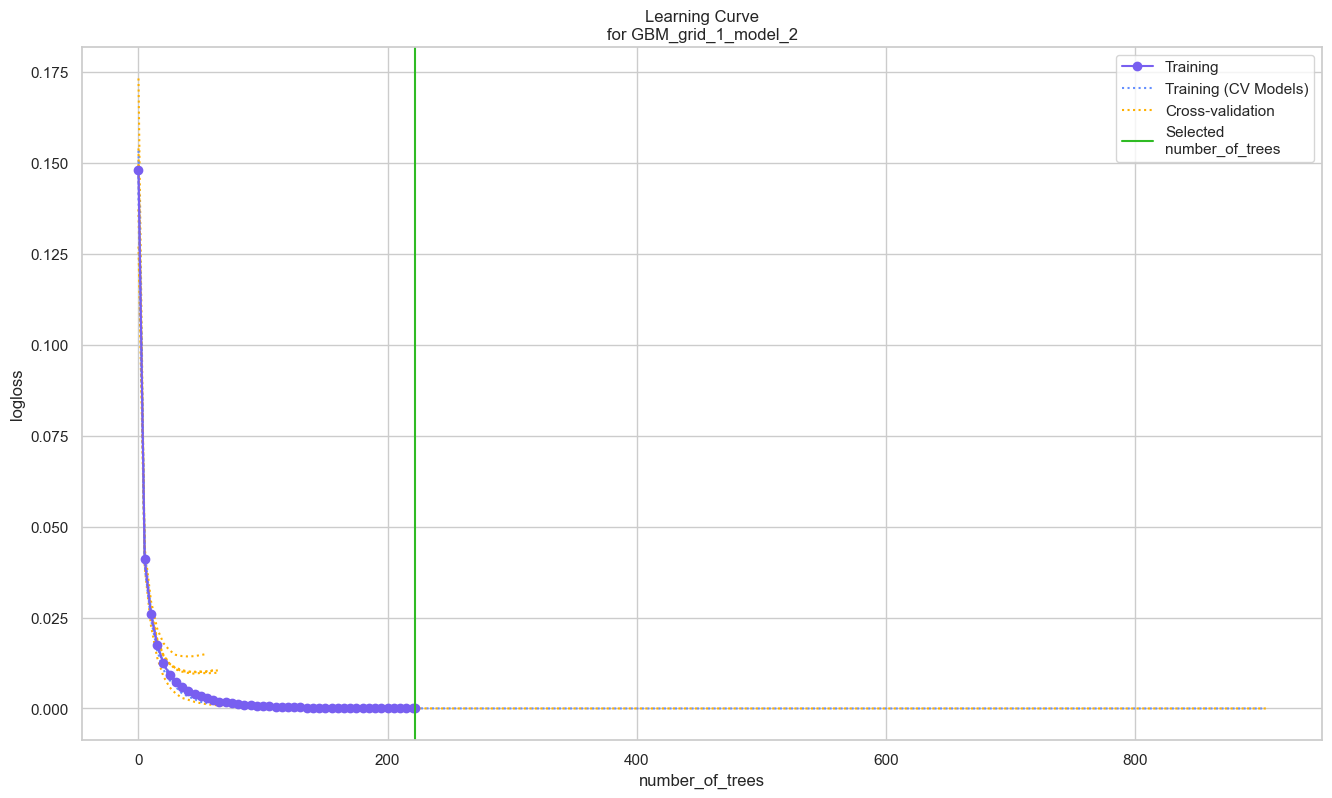

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

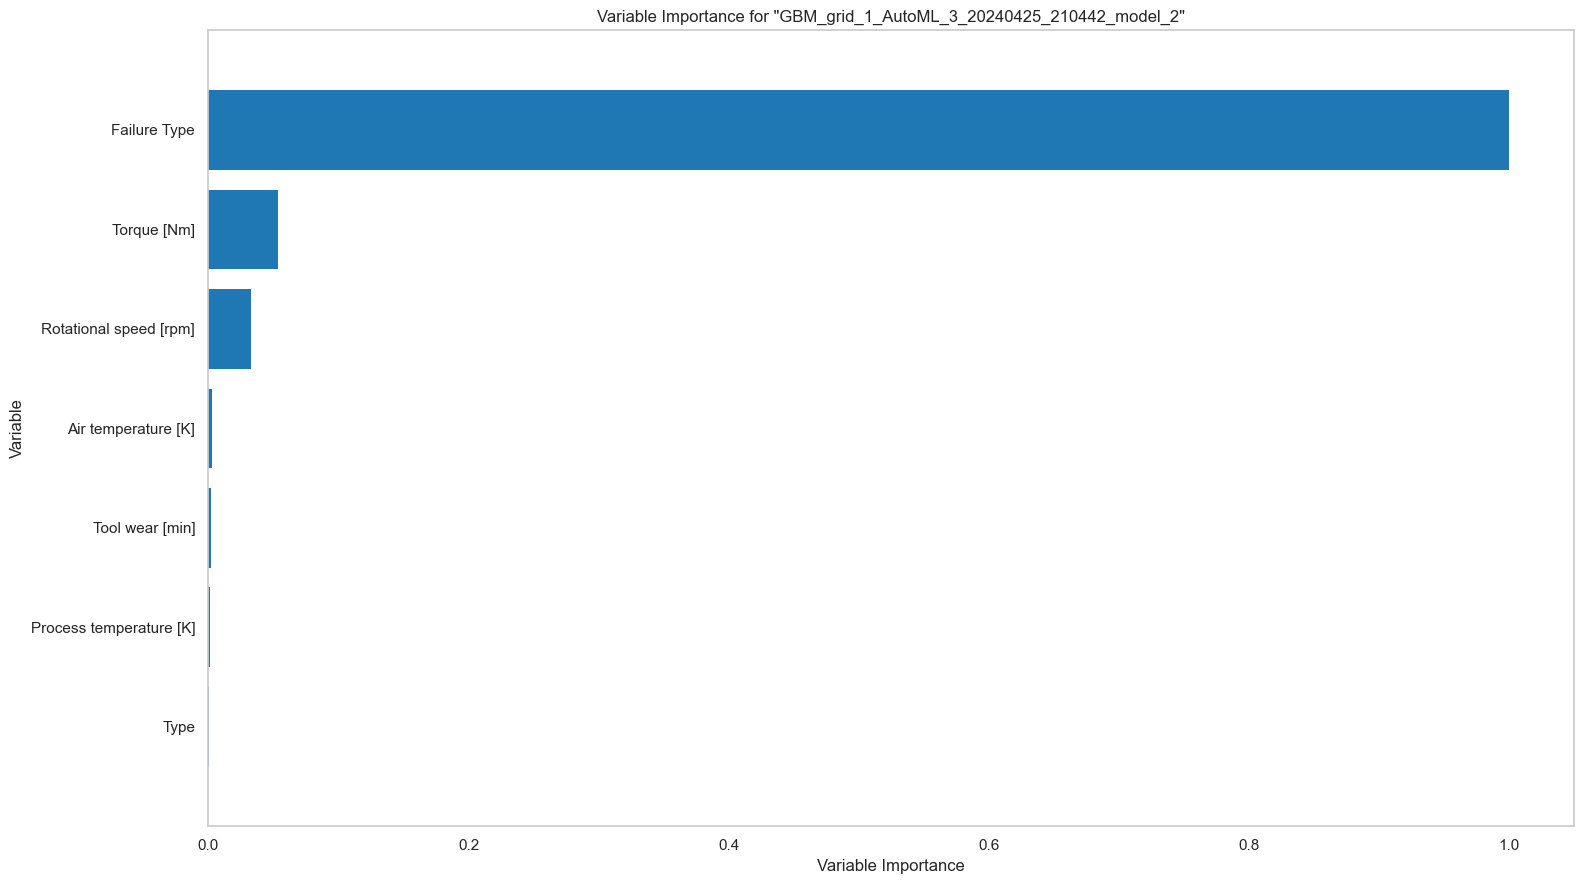

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

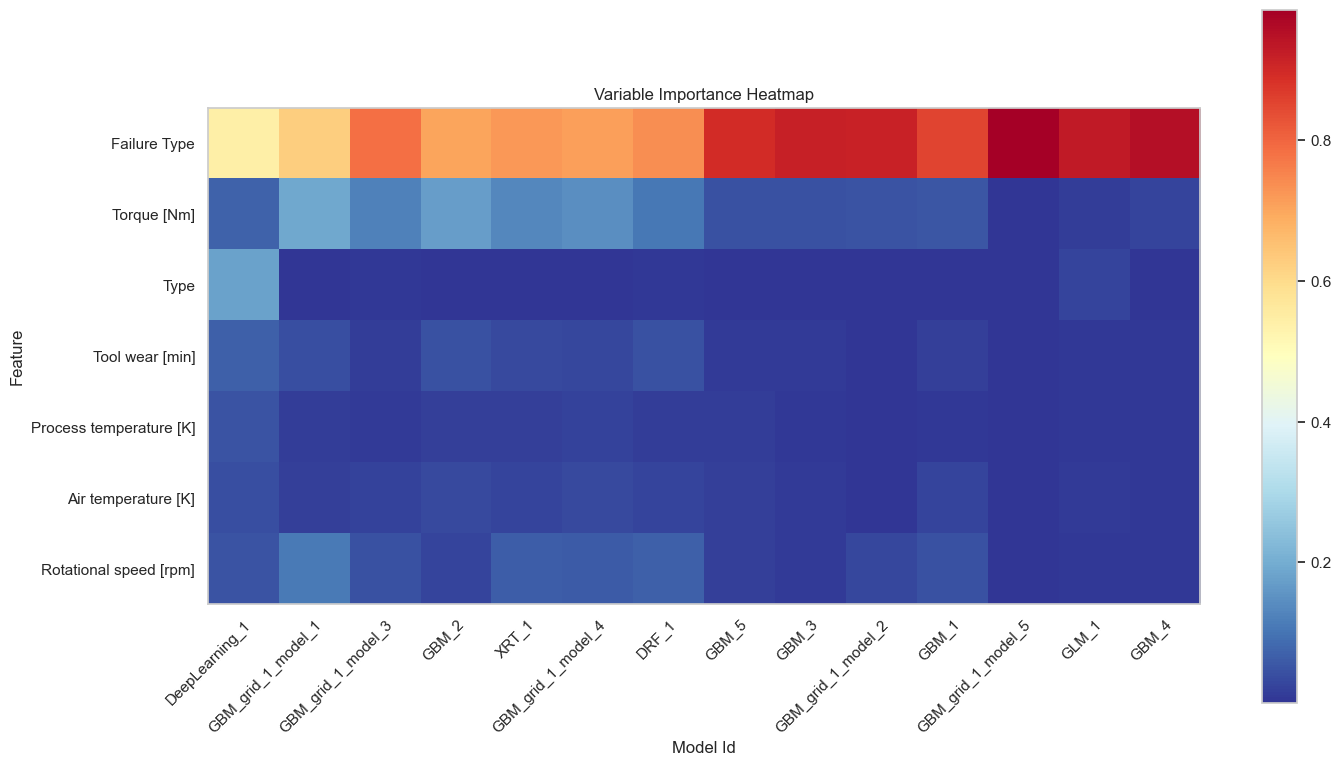

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_b37b8814ca0557fa85c1cbbf29f4c32> was cancelled by the user.

In [134]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

In [135]:
best_model = aml.leader

In [139]:
predictions.as_data_frame()


,predict,p0,p1
0,0,1.000000,1.929275e-07
1,0,0.999998,2.065142e-06
2,0,0.999991,8.851734e-06
3,0,0.999999,1.321062e-06
4,0,0.999997,2.791213e-06
...,...,...,...
2001,0,0.999999,1.286065e-06
2002,0,0.999999,1.045045e-06
2003,0,0.999998,1.886066e-06
2004,0,1.000000,4.382729e-07


In [ ]:
#######################################################

In [ ]:
from pycaret.classification import *